In [1]:
import sys
sys.path.insert(1, '../../ana_tools')
import getters, tools, graphic_tools, setters
import matplotlib.pyplot as plt
plt.style.use('../../ana_tools/presentation.mplstyle')
import numpy as np
path = "/eos/user/j/jcapotor/FBGana/camara_climatica/MarchRuns/"
plateaus = getters.get_plateaus()

/afs/cern.ch/user/j/jcapotor/FBG_TMS
/afs/cern.ch/user/j/jcapotor/FBG_TMS/ana_tools/plateaus.json


# Description of the 2023 March Runs #

The objective of this notebook is to characterise the climatic chamber for the runs taken during March 2023 at teh IFIC facilities.

In this notebook **only information about the configuration of the climatic chamber will be found.** Descriptions about the setup used and the charactersitics of the sensors will be shown in further notebooks.
## Climatic Chamber, IFIC ##

This set of runs was intended to test the repeatibility of the offsets between a given pair of FBG sensors under exact-same conditions. For this purpose, 2 types of runs were designed. One type has a given temperature profile and relative humidity left free, while the other type has a given humidity profile and temperature set to 20ºC across the whole run.

* The temperature runs were taken on days: "20230321", "20230322", "20230329" and "20230330".
* The humidity runs were taken on days: "20230323", "20230327" and "20230328".

For the first 4 runs, only one fibre was rolled onto the cylinder. The rolled fibre was FBG2 ORMOCER-coated fibre with 4 sensors at positions: 1540, 1545, 1550 and 1555 nm respectively.

From "20230328" onwards the FBG3 was also rolled to compare the behaviour of the ORMOCER-T coated fibre also. The sensors of the FBG3 are in positions: 1535, 1540, 1545, 1550 and 1555 nm respectively.

It is important to notice that for the first 4 runs the setup was NOT touched at all. The climati chamber was opened in order to recover the same initial conditions and the next run started after reaching them.

For the last 3 runs, the same story applies. After unrolling and rolling back again the two fibres on the cylinder, things were NOT manipulated again until the end of the characterisation runs.

This is important when comparing the results from different runs as there exists the possibility that results are installation-dependent, so compare not-manipulated runs among them with respect to manipulated runs can throw very useful information about the effects of fibre manipulation.

## 20230321 ##
# Description of the run #
The 20230321 run description can be found below:

* This run is a *temperature profile* run. It has 4 plateaus of 4 hour long each and a total elapsed time of 22h.
* It has only one fibre connected, *FBG2*, containing 4 sensors and coating type *ORMOCER*

The first thing to do is to get the objective temperature and humidity that the climatic chamber was following and out of that obtain the initial and final times of each of the plateaus. The resultant plateau times are stored in a json file that can be accessed using the pre-defined function *get_plateaus()*.

Keys to read: ['Hum1', 'Hum2']


Reading humidity key: Hum: 100%|██████████| 2/2 [00:02<00:00,  1.26s/it]


The plateau at 273_down is 4 hours long
The plateau at 253_down is 4 hours long
The plateau at 233_down is 4 hours long
The plateau at 213_down is 4 hours long


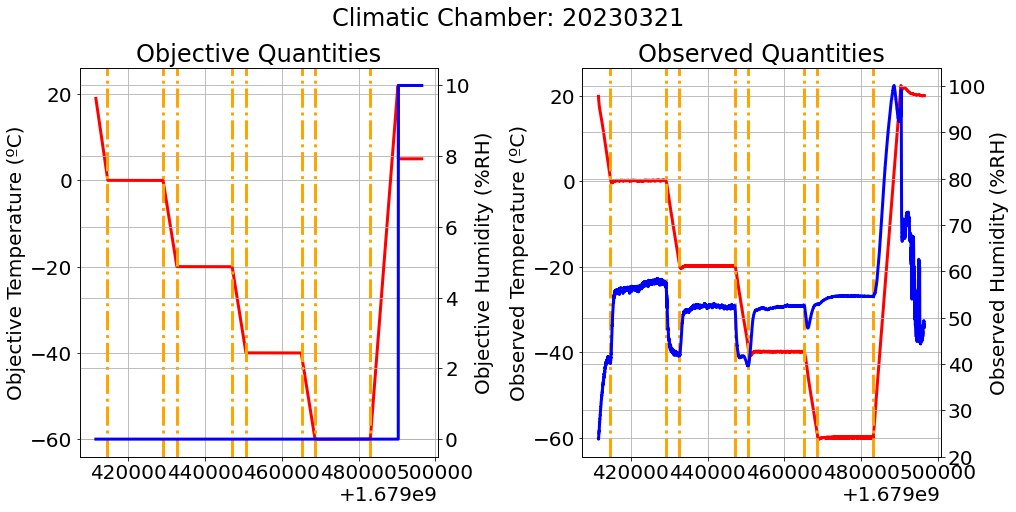

In [2]:
date = "20230321"
def plot_objective_observed(date):
    #axes[0] will containg the objective quantities, and axes[1] the measured ones by the climatic chamber
    fig, axes = graphic_tools.make_figure(ncols=2, nrows=1)
    twin_axes = graphic_tools.get_twin_axes(axes)
    fig.set_size_inches(14, 7)
    fig.suptitle("Climatic Chamber: " + date)
    #The next line loads the raw data from the climatic chamber
    climatic_chamber = getters.get_raw_data(path_to_split=path+date+"/", filetype="humidity", pol="Hum").sort_values(by="Timestamp").reset_index(drop=True)
    axes[0].plot(climatic_chamber["Timestamp"], climatic_chamber["ObRH"], color="red")
    axes[0].set_ylabel("Objective Temperature (ºC)")
    axes[0].set_title("Objective Quantities")
    twin_axes[0].plot(climatic_chamber["Timestamp"], climatic_chamber["ObT"], color="blue")
    twin_axes[0].set_ylabel("Objective Humidity (%RH)")
    axes[1].plot(climatic_chamber["Timestamp"], climatic_chamber["T"], color="red")
    axes[1].set_ylabel("Observed Temperature (ºC)")
    axes[1].set_title("Observed Quantities")
    twin_axes[1].plot(climatic_chamber["Timestamp"], climatic_chamber["RH"], color="blue")
    twin_axes[1].set_ylabel("Observed Humidity (%RH)")
    for plateau in plateaus[date]:
        t0 = plateaus[date][plateau][0]
        tf = plateaus[date][plateau][1]
        print(r"The plateau at {0} is {1:.0f} hours long".format(plateau, (tf-t0)/3600))
        axes[0].axvline(t0, linestyle="-.", color="orange")
        axes[0].axvline(tf, linestyle="-.", color="orange")
        axes[1].axvline(t0, linestyle="-.", color="orange")
        axes[1].axvline(tf, linestyle="-.", color="orange")
plot_objective_observed(date)

### Observations
As mentioned, it contains 4 plateaus at 4 temperatures and each plateaus is 4 hour long. On the left plot one can see the objective quantities and on the right the measured quantities by the sensors from the climatic chamber itself. The red curve represents **Temperature** in ºC while the blue curve represents **Relative Humidity** in %. The orange vertical-dashed lines repesent the startd and end of each of the plateaus.

From the right plot, one can see that humidity started at ~20% and very quickly it raised up to the mean value close to ~55%. When leaving humdiity free, in the objective quantities plot it turns out to appear as set to 0% while in realitiy it takes whatever value in the whole range.

One interesting thing to observe is the agreement between the objective quantity and the actual observed one. In order to characterise it, we can compare each of the plateaus and get the difference between the objective quantity and the observed one.

To do so, we select each of the plateaus and represent the temperature evolution within the plateau normalized to the objective temperature value. In that way all curves should lay close to 0ºC. The bias vale with respect to 0ºC is called in this analysis **accuracy** while the RMS of the curve is called **resolution**.

Keys to read: ['Hum1', 'Hum2']


Reading humidity key: Hum: 100%|██████████| 2/2 [00:00<00:00, 67.19it/s]


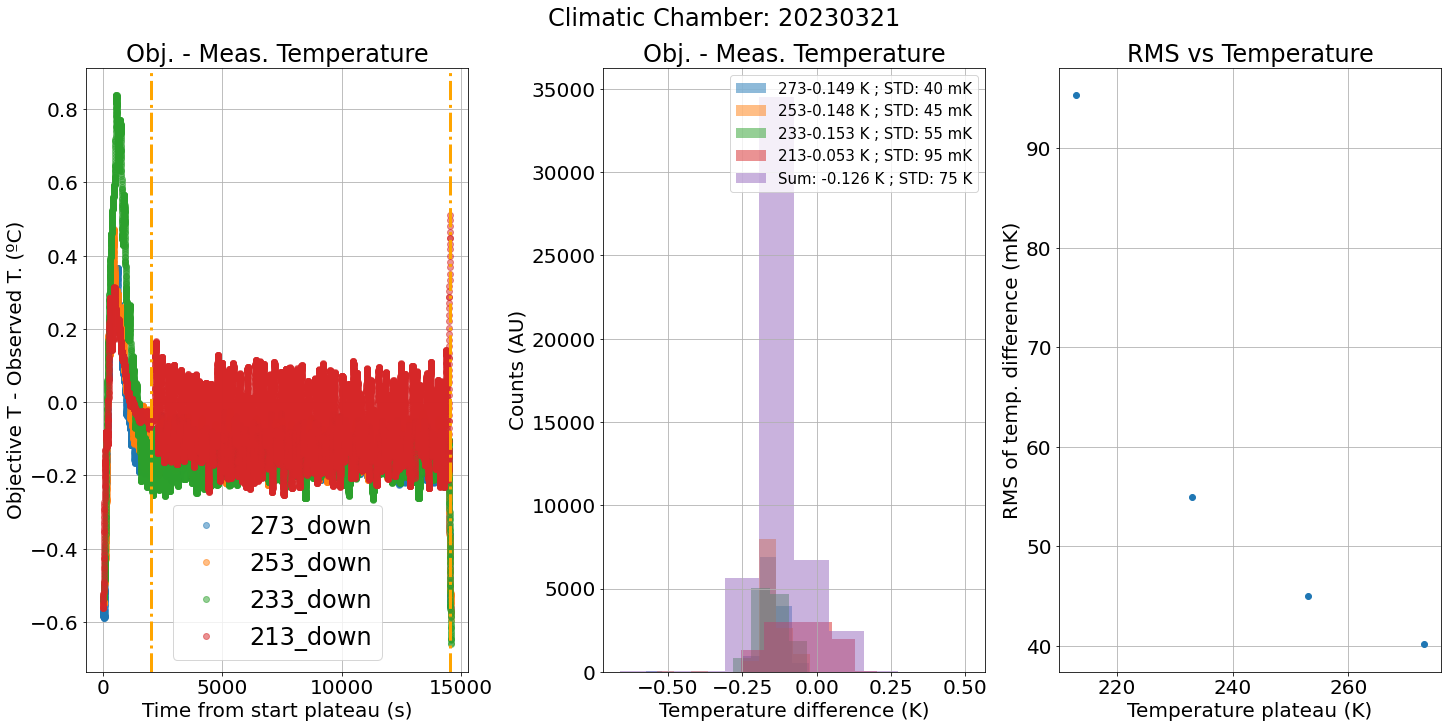

In [11]:
def plot_objective_observed_difference(date):
    fig, axes = graphic_tools.make_figure(ncols=3, nrows=1)
    fig.set_size_inches(20, 10)
    fig.suptitle("Climatic Chamber: " + date)
    #The next line loads the raw data from the climatic chamber
    climatic_chamber = getters.get_raw_data(path_to_split=path+date+"/", filetype="humidity", pol="Hum").sort_values(by="Timestamp").reset_index(drop=True)
    acumulated_differences = []
    TEMPS, STDS = [], []
    for plateau in plateaus[date]:
        t0 = plateaus[date][plateau][0]
        tf = plateaus[date][plateau][1]
        tcut = climatic_chamber.loc[(climatic_chamber["Timestamp"]>t0)&(climatic_chamber["Timestamp"]<tf)]
        axes[0].plot(tcut["Timestamp"]-t0,tcut["ObRH"]-tcut["T"],"o",alpha=0.5,label=plateau)
        tcut = climatic_chamber.loc[(climatic_chamber["Timestamp"]>t0+2000)&(climatic_chamber["Timestamp"]<tf)]
        axes[1].hist(tcut["ObRH"]-tcut["T"],
                    alpha=0.5,
                    density=False,
                    label=r"{0}{1:.3f} K ; STD: {2:.0f} mK".format(plateau.split("_")[0], np.mean(tcut["ObRH"]-tcut["T"]), 1e3*np.std(tcut["ObRH"]-tcut["T"])))
        acumulated_differences += list(tcut["ObRH"]-tcut["T"].values)
        TEMPS.append(int(plateau.split("_")[0]))
        STDS.append(1e3*np.std(tcut["ObRH"]-tcut["T"]))

    axes[1].hist(acumulated_differences,
                alpha=0.5, density=False, fill=True,
                label=r"Sum: {0:.3f} K ; STD: {1:.0f} K".format(np.mean(acumulated_differences), 1e3*np.std(acumulated_differences)))
    axes[2].plot(TEMPS, STDS, "o", label="")
    axes[0].legend()
    axes[1].legend(fontsize=15)
    axes[0].set_title("Obj. - Meas. Temperature")
    axes[0].set_xlabel("Time from start plateau (s)")
    axes[0].set_ylabel("Objective T - Observed T. (ºC)")
    axes[1].set_title("Obj. - Meas. Temperature")
    axes[1].set_xlabel("Temperature difference (K)")
    axes[1].set_ylabel("Counts (AU)")
    axes[2].set_title("RMS vs Temperature")
    axes[2].set_xlabel("Temperature plateau (K)")
    axes[2].set_ylabel("RMS of temp. difference (mK)")
    #We notice how the agreement within the first 2500s is not very good, so the cuts have to be shortened 2500s from the starting point
    axes[0].axvline(2000, linestyle="-.", color="orange")
    axes[0].axvline(tf-t0, linestyle="-.", color="orange")
plot_objective_observed_difference(date)

### Observations
We notice how there is certain stabilization time for the temperature to reach the designed objective value. For this reason, to compute the bias and the resolution the plateau times must be corrected for this stabilisation time.

On the left plot one can see the difference between the objective and observed temperatures for each of the plateaus (in the legend, the sufix "down" makes reference that the temperature was going down for this profile). The orange vertical-dashed lines represent the new plateau times. In this case, to the initial plateau time 2000 s (33 min) must be added in order to get only the stable region.

On the center plot, the histogram of the temperature difference values on each of the plateaus can be seen. Out of this plot, one calculates the mean and the RMS of the distributions and associate them to the previously mentioned accuracy and resolution repsectively.

Finally, one interesting thing to observe is that the resolution is worsening as temperature decreases. To do so, in the righ plot we represent the RMS of the temperature differences in each of the plateaus against the temperature of each of the plateaus. One can see how there is a clear trend where resolution gets worse as temperature decreases. This may indicate that it is more difficult for the chamber to keep temperature stable at smaller temperatures. It can also be associated to a lack of resolution of the temperature sensor at smaller temperatures.

By taking the average of the bias vales, we can get an estimation on the **accuracy of the temperature determination** out of these previous plots to be: *-0.125 +- 0.07 K*. The error on this calculation has considered the RMS od the means and the errors associated to the resolutions.

One thing that remains to be studied is the evolution of the humidity for this temperature run in the plateaus. For this, we can select the plateaus and represent the humidity evolution on each of them.

Keys to read: ['Hum1', 'Hum2']


Reading humidity key: Hum: 100%|██████████| 2/2 [00:00<00:00, 45.24it/s]


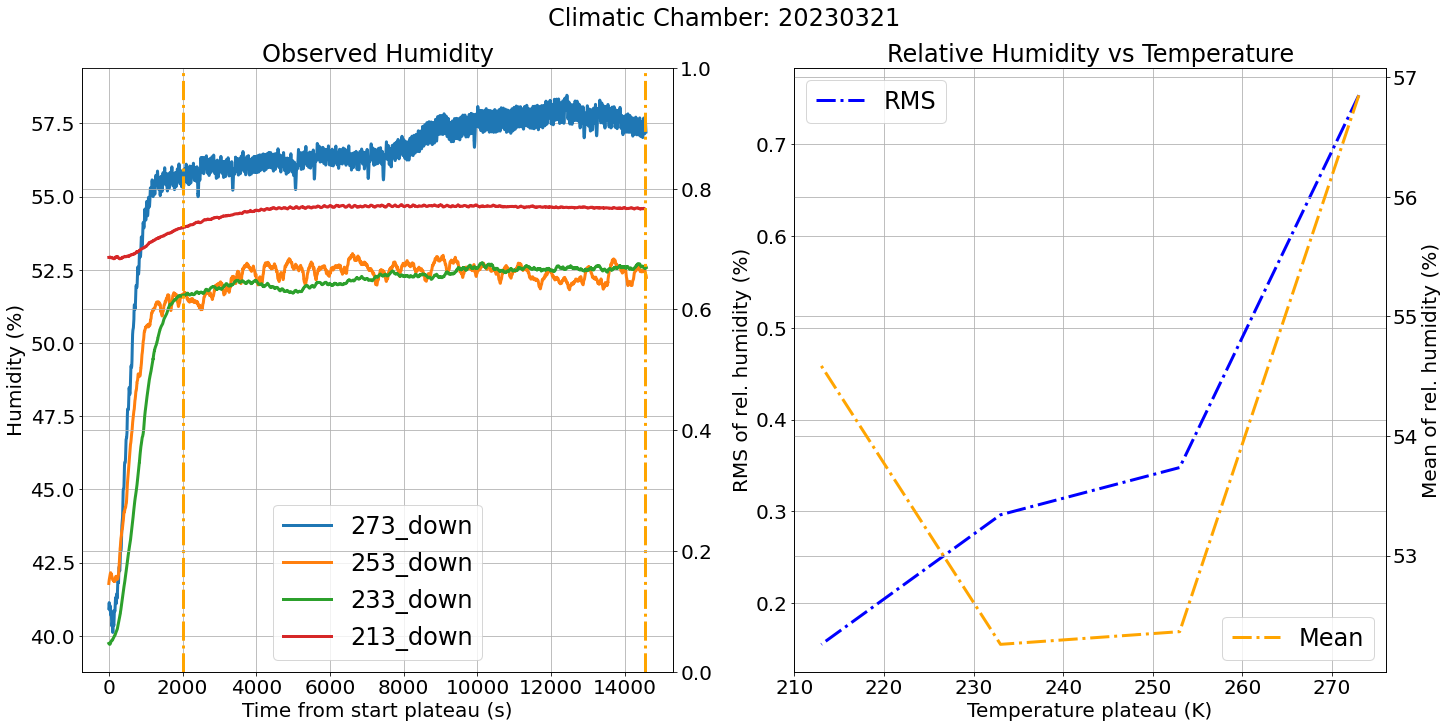

In [15]:
def plot_observed_humidity(date):
    fig, axes = graphic_tools.make_figure(ncols=2, nrows=1)
    twin_axes = graphic_tools.get_twin_axes(axes)
    fig.set_size_inches(20, 10)
    fig.suptitle("Climatic Chamber: " + date)
    #The next line loads the raw data from the climatic chamber
    climatic_chamber = getters.get_raw_data(path_to_split=path+date+"/", filetype="humidity", pol="Hum").sort_values(by="Timestamp").reset_index(drop=True)
    acumulated_differences = []
    TEMPS, STDS, MEANS = [], [], []
    for plateau in plateaus[date]:
        t0 = plateaus[date][plateau][0]
        tf = plateaus[date][plateau][1]
        tcut = climatic_chamber.loc[(climatic_chamber["Timestamp"]>t0)&(climatic_chamber["Timestamp"]<tf)]
        axes[0].plot(tcut["Timestamp"]-t0,tcut["RH"],label=plateau)
        tcut = climatic_chamber.loc[(climatic_chamber["Timestamp"]>t0+2000)&(climatic_chamber["Timestamp"]<tf)]
        acumulated_differences += list(tcut["RH"].values)
        TEMPS.append(int(plateau.split("_")[0]))
        MEANS.append(np.mean(tcut["RH"]))
        STDS.append(np.std(tcut["RH"]))

    twin_axes[1].plot(TEMPS, MEANS, "-.", color="orange", label="Mean")
    axes[1].plot(TEMPS, STDS, "-.", color="blue", label="RMS")
    axes[0].legend()
    axes[1].legend(loc="upper left")
    twin_axes[1].legend(loc="lower right")
    axes[0].set_title("Observed Humidity")
    axes[0].set_xlabel("Time from start plateau (s)")
    axes[0].set_ylabel("Humidity (%)")
    axes[1].set_title("Relative Humidity vs Temperature")
    axes[1].set_xlabel("Temperature plateau (K)")
    axes[1].set_ylabel("RMS of rel. humidity (%)")
    twin_axes[1].set_ylabel("Mean of rel. humidity (%)")
    #We notice how the agreement within the first 2500s is not very good, so the cuts have to be shortened 2500s from the starting point
    axes[0].axvline(2000, linestyle="-.", color="orange")
    axes[0].axvline(tf-t0, linestyle="-.", color="orange")
plot_observed_humidity(date)

### Observations

On the left plot one can see the relative humidity evolution on each of the plateaus. It is interesting to notice how absolute humidity values are distributed around 55 % for all plateaus.

On the right plot, what one can see is the RMS of the relative humidity agains the temperature value, and the absolute value of it as well. It is clear how in this case the RMS of the humidity decreases with temperature. There could be plenty of explanations for that behaviour, and it is something that could be further investigated if necessary.

## 20230322 ##
# Description of the run #
The 20230322 run description can be found below:

* This run is a *temperature profile* run. It has 4 plateaus of 4 hour long each and a total elapsed time of 22h.
* It has only one fibre connected, *FBG2*, containing 4 sensors and coating type *ORMOCER*

We use the same functions as for the 20230321 run to do the same plots.

Keys to read: ['Hum1']


Reading humidity key: Hum: 100%|██████████| 1/1 [00:00<00:00, 15.14it/s]

The plateau at 273_down is 4 hours long
The plateau at 253_down is 4 hours long
The plateau at 233_down is 4 hours long
The plateau at 213_down is 4 hours long


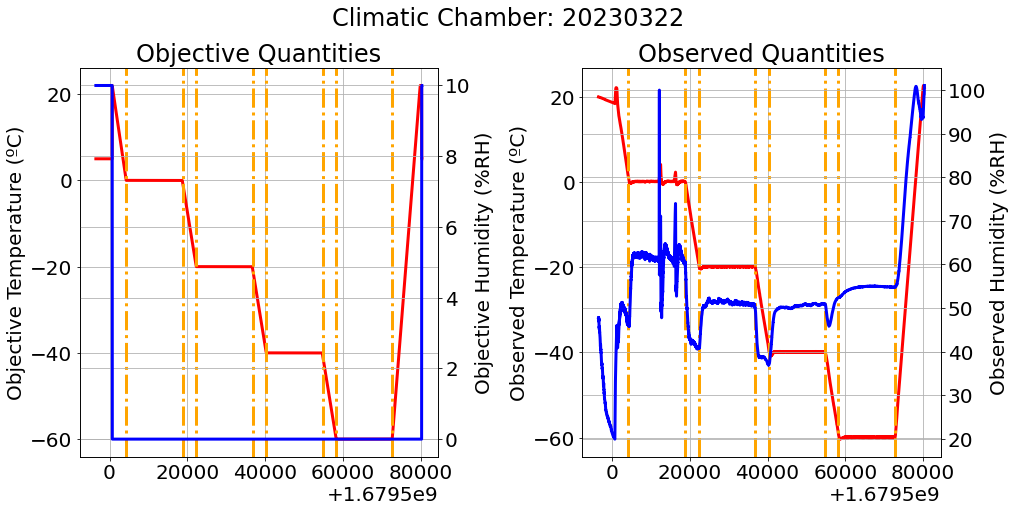

In [17]:
date = "20230322"
plot_objective_observed(date)

### Observations
One can see form the right plot how before starting the run, humidity was decreased close to the 20% value that we set up as initial value, then it was left free for the rest of the run.

Something that is interesting and that does not appear in the 20230321 run is that at the 273 plateau there are a couple of humidity spikes. The first one almost reached 100% humidity and that is something that must be understood, as it is not very normal to see in the middle of a plateau.

In fact, these spikes coincide in time with 2 spikes in the observed temperature. It can be seen in more detail in the following plots.

Keys to read: ['Hum1']


Reading humidity key: Hum: 100%|██████████| 1/1 [00:00<00:00, 41.41it/s]


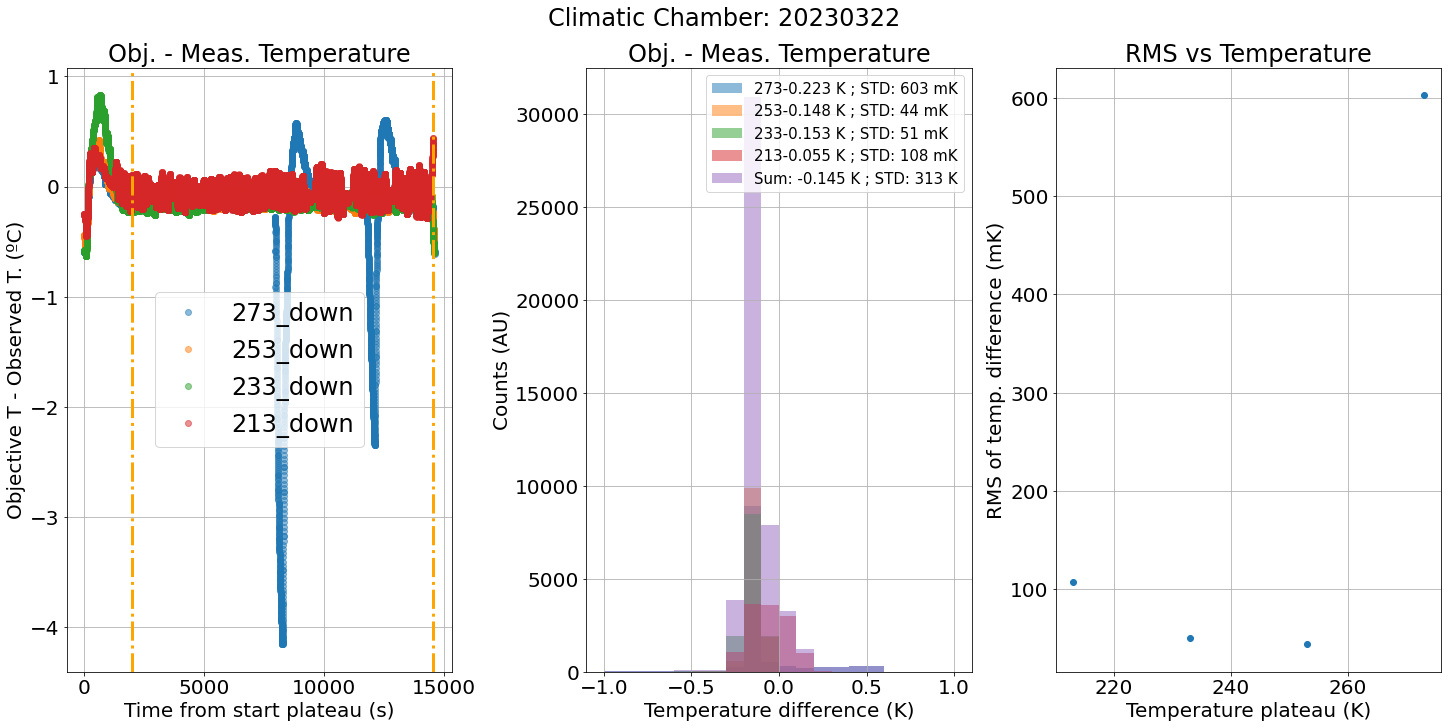

In [22]:
def plot_objective_observed_difference(date):
    fig, axes = graphic_tools.make_figure(ncols=3, nrows=1)
    fig.set_size_inches(20, 10)
    fig.suptitle("Climatic Chamber: " + date)
    #The next line loads the raw data from the climatic chamber
    climatic_chamber = getters.get_raw_data(path_to_split=path+date+"/", filetype="humidity", pol="Hum").sort_values(by="Timestamp").reset_index(drop=True)
    acumulated_differences = []
    TEMPS, STDS = [], []
    for plateau in plateaus[date]:
        t0 = plateaus[date][plateau][0]
        tf = plateaus[date][plateau][1]
        tcut = climatic_chamber.loc[(climatic_chamber["Timestamp"]>t0)&(climatic_chamber["Timestamp"]<tf)]
        axes[0].plot(tcut["Timestamp"]-t0,tcut["ObRH"]-tcut["T"],"o",alpha=0.5,label=plateau)
        tcut = climatic_chamber.loc[(climatic_chamber["Timestamp"]>t0+2000)&(climatic_chamber["Timestamp"]<tf)]
        axes[1].hist(tcut["ObRH"]-tcut["T"],
                    alpha=0.5,
                    density=False,
                     range=(-1,1),
                     bins=20,
                    label=r"{0}{1:.3f} K ; STD: {2:.0f} mK".format(plateau.split("_")[0], np.mean(tcut["ObRH"]-tcut["T"]), 1e3*np.std(tcut["ObRH"]-tcut["T"])))
        acumulated_differences += list(tcut["ObRH"]-tcut["T"].values)
        TEMPS.append(int(plateau.split("_")[0]))
        STDS.append(1e3*np.std(tcut["ObRH"]-tcut["T"]))

    axes[1].hist(acumulated_differences,
                 range=(-1,1),
                 bins=20,
                alpha=0.5, density=False, fill=True,
                label=r"Sum: {0:.3f} K ; STD: {1:.0f} K".format(np.mean(acumulated_differences), 1e3*np.std(acumulated_differences)))
    axes[2].plot(TEMPS, STDS, "o", label="")
    axes[0].legend()
    axes[1].legend(fontsize=15)
    axes[0].set_title("Obj. - Meas. Temperature")
    axes[0].set_xlabel("Time from start plateau (s)")
    axes[0].set_ylabel("Objective T - Observed T. (ºC)")
    axes[1].set_title("Obj. - Meas. Temperature")
    axes[1].set_xlabel("Temperature difference (K)")
    axes[1].set_ylabel("Counts (AU)")
    axes[2].set_title("RMS vs Temperature")
    axes[2].set_xlabel("Temperature plateau (K)")
    axes[2].set_ylabel("RMS of temp. difference (mK)")
    #We notice how the agreement within the first 2500s is not very good, so the cuts have to be shortened 2500s from the starting point
    axes[0].axvline(2000, linestyle="-.", color="orange")
    axes[0].axvline(tf-t0, linestyle="-.", color="orange")
plot_objective_observed_difference(date)

### Observations

On the left plot one can see the previously mentioned spikes in the 273 K plateau. It is because of these spikes that the RMS of the temperature difference distribution for this specific plateaus reaches de 603 mK value. We can get rid of them by filtering out that dataframe.

Keys to read: ['Hum1']


Reading humidity key: Hum: 100%|██████████| 1/1 [00:00<00:00, 37.01it/s]


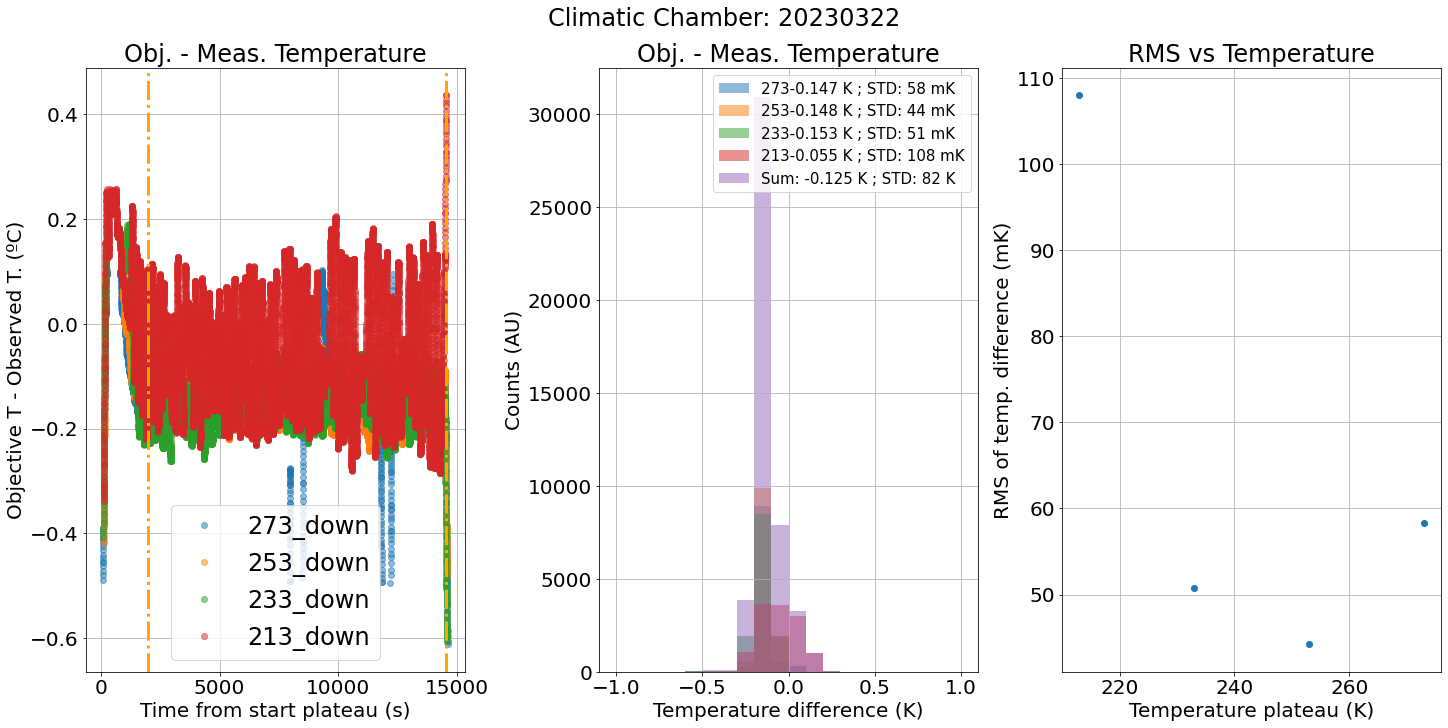

In [36]:
def plot_objective_observed_difference(date):
    fig, axes = graphic_tools.make_figure(ncols=3, nrows=1)
    fig.set_size_inches(20, 10)
    fig.suptitle("Climatic Chamber: " + date)
    #The next line loads the raw data from the climatic chamber
    climatic_chamber = getters.get_raw_data(path_to_split=path+date+"/", filetype="humidity", pol="Hum").sort_values(by="Timestamp").reset_index(drop=True)
    acumulated_differences = []
    TEMPS, STDS = [], []
    for plateau in plateaus[date]:
        t0 = plateaus[date][plateau][0]
        tf = plateaus[date][plateau][1]
        tcut = climatic_chamber.loc[(climatic_chamber["Timestamp"]>t0)&(climatic_chamber["Timestamp"]<tf)]
        tcut = tcut.loc[abs(tcut["T"]-np.mean(tcut["T"]))<0.3]
        axes[0].plot(tcut["Timestamp"]-t0,tcut["ObRH"]-tcut["T"],"o",alpha=0.5,label=plateau)
        tcut = tcut.loc[(tcut["Timestamp"]>t0+2000)&(tcut["Timestamp"]<tf)]
        axes[1].hist(tcut["ObRH"]-tcut["T"],
                    alpha=0.5,
                    density=False,
                     range=(-1,1),
                     bins=20,
                    label=r"{0}{1:.3f} K ; STD: {2:.0f} mK".format(plateau.split("_")[0], np.mean(tcut["ObRH"]-tcut["T"]), 1e3*np.std(tcut["ObRH"]-tcut["T"])))
        acumulated_differences += list(tcut["ObRH"]-tcut["T"].values)
        TEMPS.append(int(plateau.split("_")[0]))
        STDS.append(1e3*np.std(tcut["ObRH"]-tcut["T"]))

    axes[1].hist(acumulated_differences,
                 range=(-1,1),
                 bins=20,
                alpha=0.5, density=False, fill=True,
                label=r"Sum: {0:.3f} K ; STD: {1:.0f} K".format(np.mean(acumulated_differences), 1e3*np.std(acumulated_differences)))
    axes[2].plot(TEMPS, STDS, "o", label="")
    axes[0].legend()
    axes[1].legend(fontsize=15)
    axes[0].set_title("Obj. - Meas. Temperature")
    axes[0].set_xlabel("Time from start plateau (s)")
    axes[0].set_ylabel("Objective T - Observed T. (ºC)")
    axes[1].set_title("Obj. - Meas. Temperature")
    axes[1].set_xlabel("Temperature difference (K)")
    axes[1].set_ylabel("Counts (AU)")
    axes[2].set_title("RMS vs Temperature")
    axes[2].set_xlabel("Temperature plateau (K)")
    axes[2].set_ylabel("RMS of temp. difference (mK)")
    #We notice how the agreement within the first 2500s is not very good, so the cuts have to be shortened 2500s from the starting point
    axes[0].axvline(2000, linestyle="-.", color="orange")
    axes[0].axvline(tf-t0, linestyle="-.", color="orange")
plot_objective_observed_difference(date)

### Observations

With this very naive cut, we have removed the major part of the spikes and the obtained RMS vale better agrees with the xpected. Althoug, to cut it properly a temporal cut should be performed instead of a cut based on the spike value.

Keys to read: ['Hum1']


Reading humidity key: Hum: 100%|██████████| 1/1 [00:00<00:00, 49.46it/s]


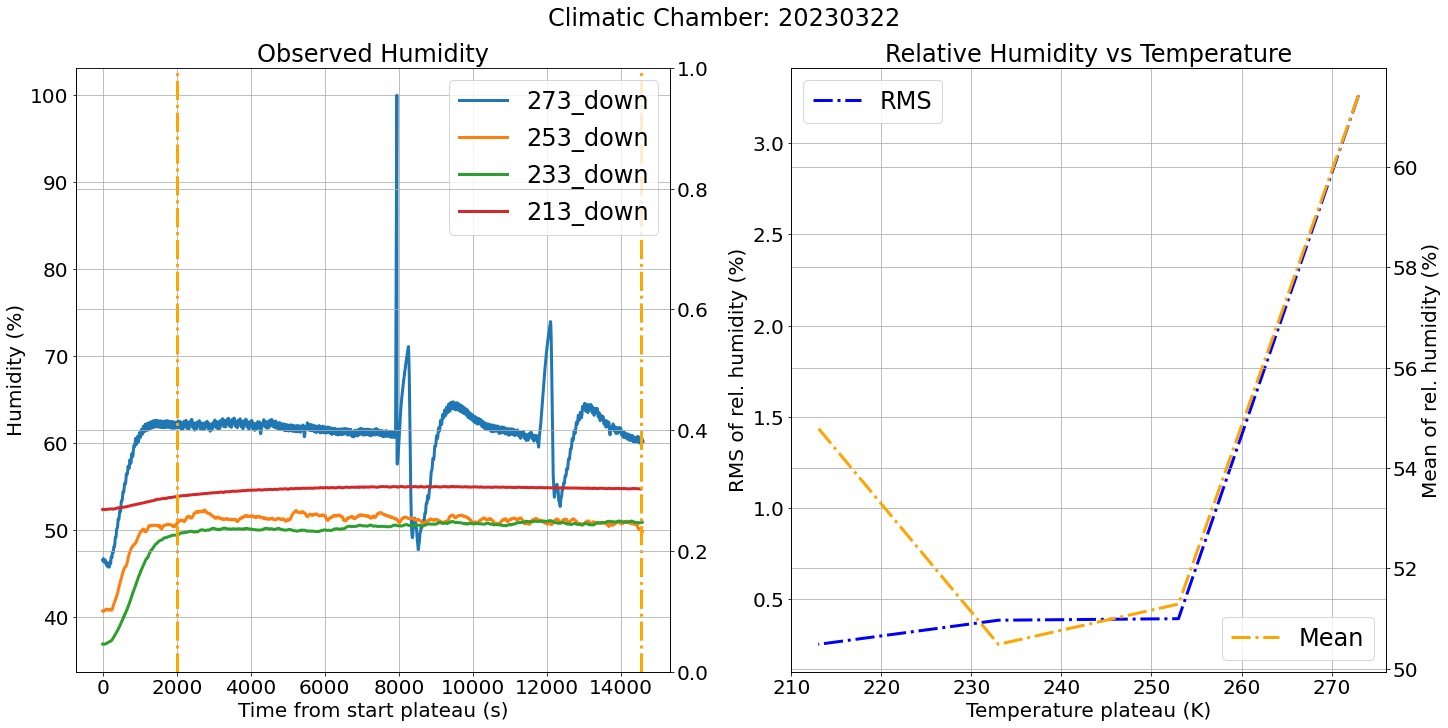

In [35]:
plot_observed_humidity(date)

### Observations

Notice the huge spikes in the humidity for the 273 plateau. It is interesting to see how it looks like a real effect because it tries to stabilize the value by following the upcoming large oscillations.

## 20230329 ##
# Description of the run #
The 20230329 run description can be found below:

* This run is a *temperature profile* run. It has 4 plateaus of 4 hour long each and a total elapsed time of 22h.
* It has two fibres connected: *FBG2*, containing 4 sensors and coating type *ORMOCER*, and *FBG3* containing 5 sensors and coating type *ORMOCER-T*

We use the same functions as for the 20230321 run to do the same plots.

Keys to read: ['Hum1']


Reading humidity key: Hum: 100%|██████████| 1/1 [00:00<00:00, 20.00it/s]

The plateau at 273_down is 4 hours long
The plateau at 253_down is 4 hours long
The plateau at 233_down is 4 hours long
The plateau at 213_down is 4 hours long


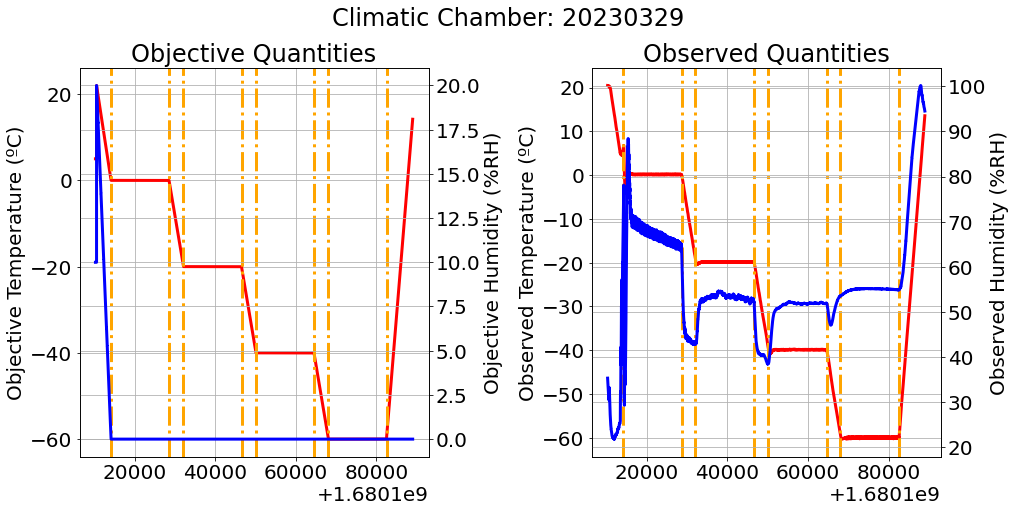

In [38]:
date = "20230329"
plot_objective_observed(date)

### Observations

Again, humidity was set initially to the initl vale close to 20%.

Keys to read: ['Hum1']


Reading humidity key: Hum: 100%|██████████| 1/1 [00:01<00:00,  1.76s/it]


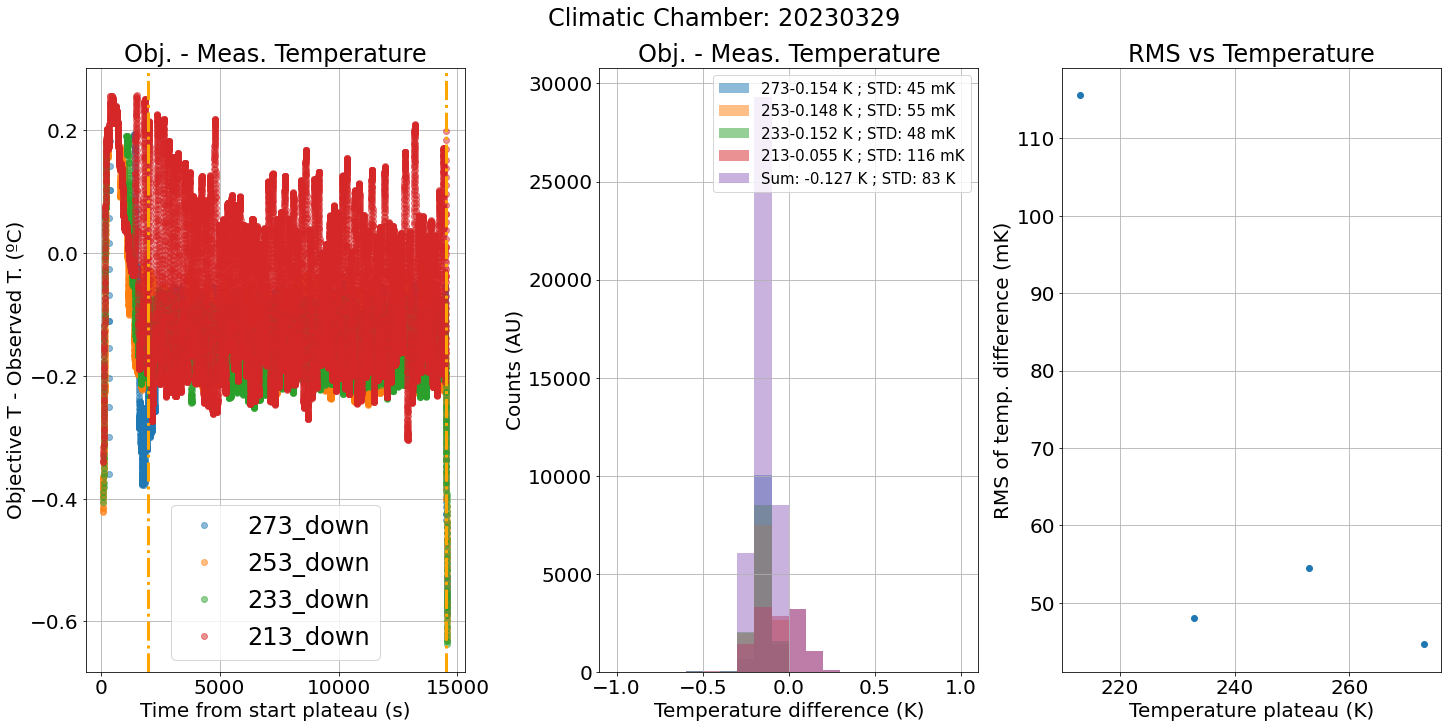

In [39]:
plot_objective_observed_difference(date)

Keys to read: ['Hum1']


Reading humidity key: Hum: 100%|██████████| 1/1 [00:00<00:00, 34.32it/s]


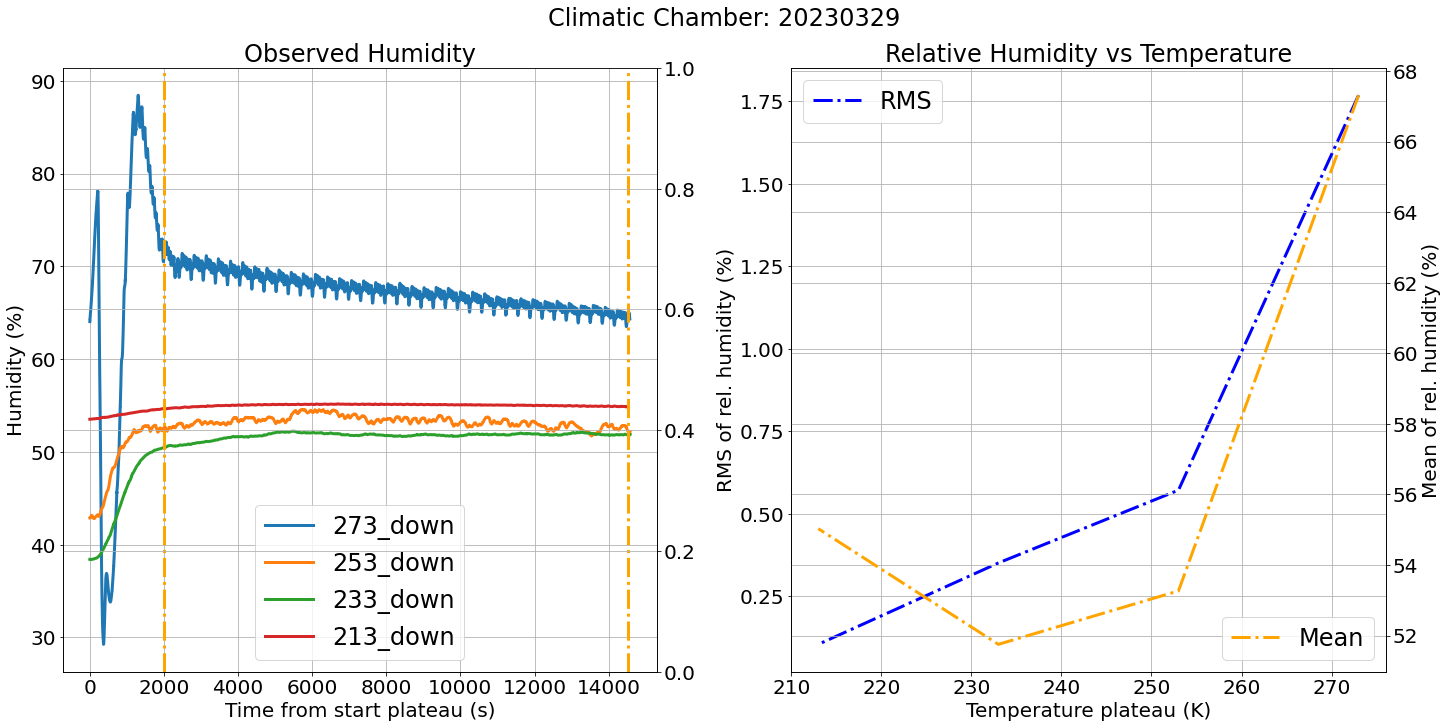

In [40]:
plot_observed_humidity(date)

### Observations

Something strange that can be seen here is the oscillation pattern in the recorded humidity for the plateau at 273K. This oscillation pattern has been previously observed in the FBG peaks and is probably something to worry about.

To characterise it, we will get the fourier transform of the signal and look for the corresponding peak in the frequency domain.

Keys to read: ['Hum1']


Reading humidity key: Hum: 100%|██████████| 1/1 [00:00<00:00, 15.87it/s]
/afs/cern.ch/user/j/jcapotor/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


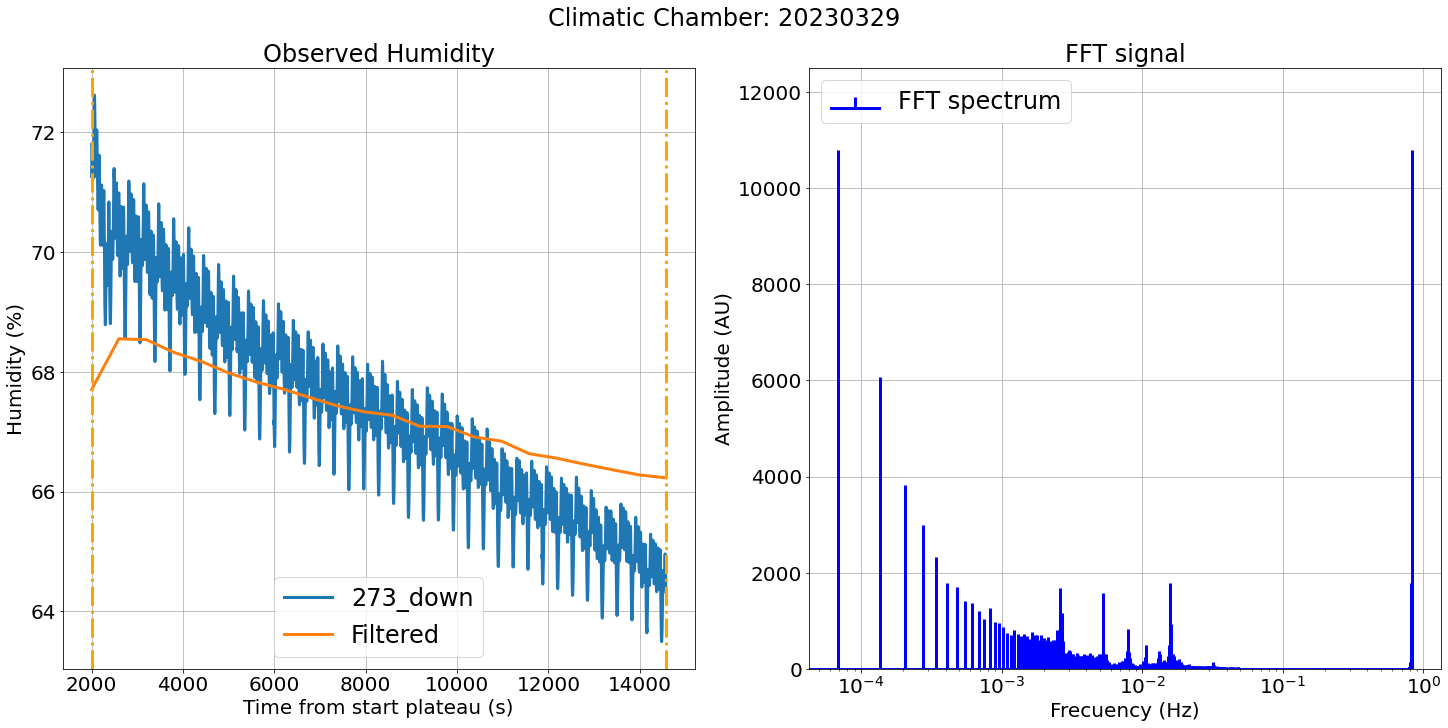

In [98]:
from numpy.fft import fft, ifft
import pandas as pd
def plot_fft_humidity(date):
    fig, axes = graphic_tools.make_figure(ncols=2, nrows=1)
    fig.set_size_inches(20, 10)
    fig.suptitle("Climatic Chamber: " + date)
    #The next line loads the raw data from the climatic chamber
    climatic_chamber = getters.get_raw_data(path_to_split=path+date+"/", filetype="humidity", pol="Hum").sort_values(by="Timestamp").reset_index(drop=True)
    for plateau in plateaus[date]:
        if plateau != "273_down":
            continue
        t0 = plateaus[date][plateau][0]
        tf = plateaus[date][plateau][1]
        tcut = climatic_chamber.loc[(climatic_chamber["Timestamp"]>t0)&(climatic_chamber["Timestamp"]<tf)]
        tcut = climatic_chamber.loc[(climatic_chamber["Timestamp"]>t0+2000)&(climatic_chamber["Timestamp"]<tf)]
        axes[0].plot(tcut["Timestamp"]-t0,tcut["RH"],label=plateau)
        # sampling rate
        sr = len(tcut)/(tf-t0)
        # sampling interval
        ts = 1.0/sr
        X = fft(tcut["RH"])
        N = len(X)
        n = np.arange(N)
        T = N/sr
        freq = n/T 
        axes[1].stem(freq, np.abs(X), 'b', \
             markerfmt=" ", basefmt="-b", label="FFT spectrum")
        fft_df = pd.DataFrame(np.array([np.abs(freq), X]).T)
        fft_df.columns = ["freq", "amp"]
        fft_df = fft_df.loc[(fft_df["freq"])<1.5e-3]
        filtered = ifft(fft_df["amp"])
        xs = np.linspace(2000, tf-t0, len(filtered))
        axes[0].plot(xs, np.mean(tcut["RH"])*filtered/np.mean(filtered), label="Filtered")
    axes[1].set_xscale('log')
    axes[0].legend()
    axes[1].legend(loc="upper left")
    axes[0].set_title("Observed Humidity")
    axes[0].set_xlabel("Time from start plateau (s)")
    axes[0].set_ylabel("Humidity (%)")
    axes[1].set_title("FFT signal")
    axes[1].set_xlabel("Frecuency (Hz)")
    axes[1].set_ylabel("Amplitude (AU)")
    axes[1].set_ylim(0, 12500)
    axes[0].axvline(2000, linestyle="-.", color="orange")
    axes[0].axvline(tf-t0, linestyle="-.", color="orange")
plot_fft_humidity(date)

### Observations

From the right plot, one can see how the frequency of the oscillation lays close to 10⁻2 Hz, which represents a period about ~300s. Then, the nature of the oscillation can not be cause by the electric supply.

## 20230323 ##
# Description of the run #

* This run is a *humidity profile* run. It has 8 plateaus of 2 hour long each and a total elapsed time of 22h.
* It has only one fibre connected, *FBG2*, containing 4 sensors and coating type *ORMOCER*

Keys to read: ['Hum1']


Reading humidity key: Hum: 100%|██████████| 1/1 [00:00<00:00,  6.51it/s]

The plateau at 20_up is 2 hours long
The plateau at 40_up is 2 hours long
The plateau at 60_up is 2 hours long
The plateau at 40_down is 2 hours long
The plateau at 20_down is 2 hours long
The plateau at 40_up2 is 2 hours long
The plateau at 60_up2 is 2 hours long


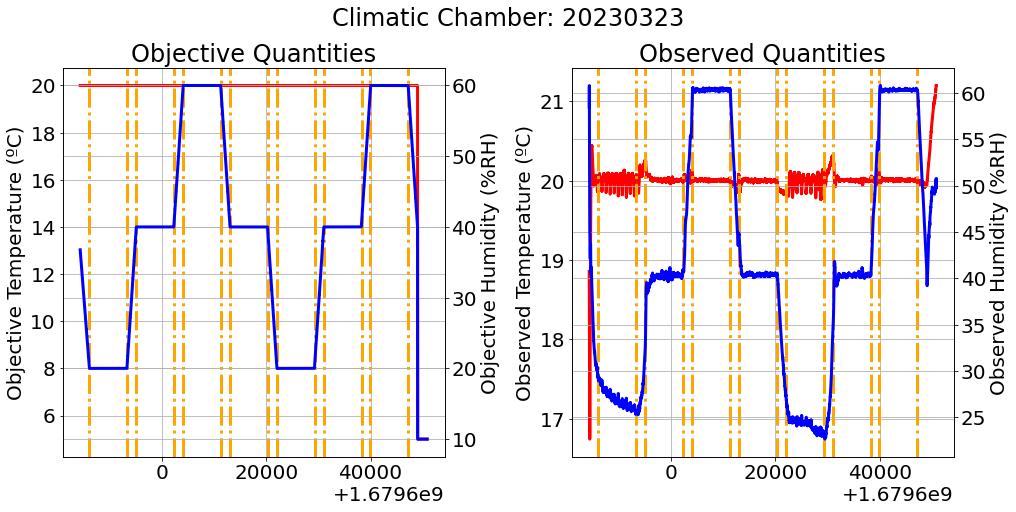

In [99]:
date = "20230323"
plot_objective_observed(date)

### Observations

The humidity profile can be characterised as a 1.5 cycle. From the observed temperature, one can see how for the chamber it is much more difficult to keep temperature stable at lower relative humidity atmposhperes.

Keys to read: ['Hum1']


Reading humidity key: Hum: 100%|██████████| 1/1 [00:00<00:00, 69.21it/s]


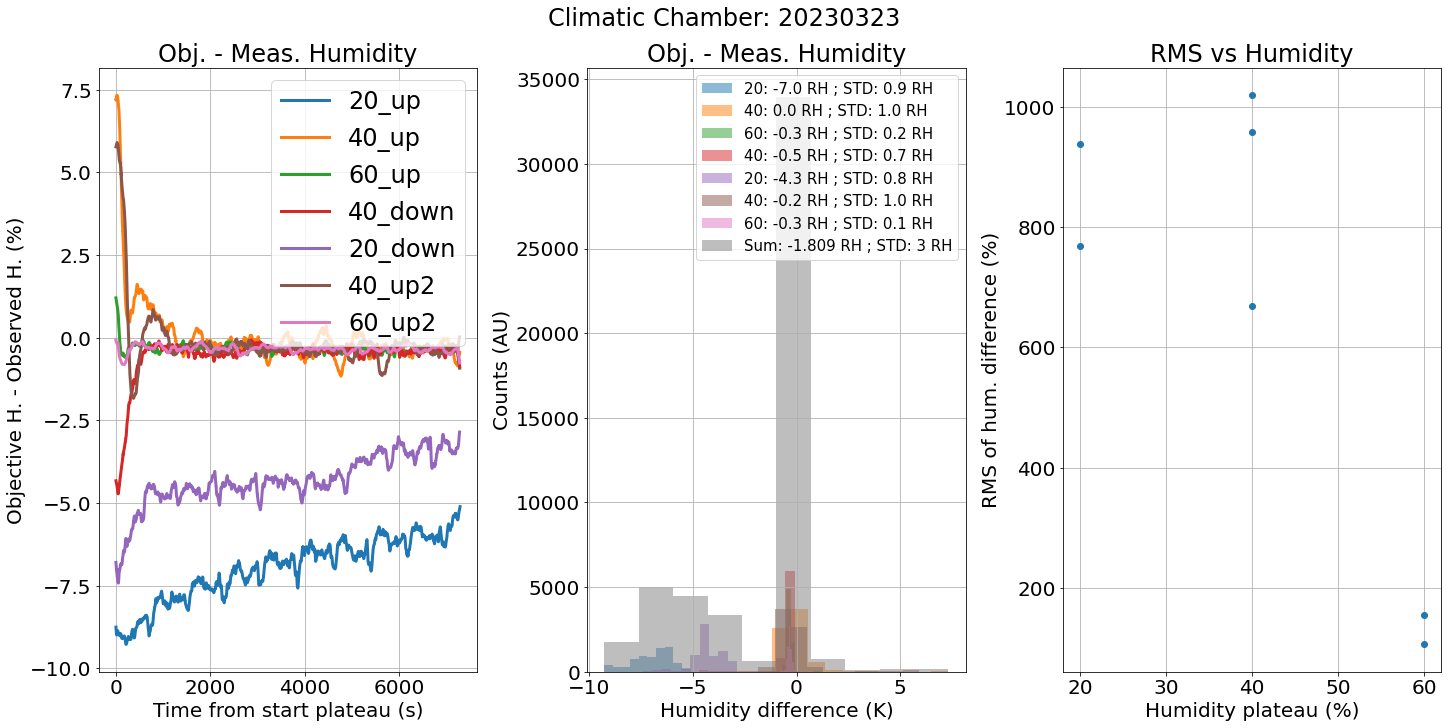

In [102]:
def plot_objective_observed_difference(date):
    fig, axes = graphic_tools.make_figure(ncols=3, nrows=1)
    fig.set_size_inches(20, 10)
    fig.suptitle("Climatic Chamber: " + date)
    #The next line loads the raw data from the climatic chamber
    climatic_chamber = getters.get_raw_data(path_to_split=path+date+"/", filetype="humidity", pol="Hum").sort_values(by="Timestamp").reset_index(drop=True)
    acumulated_differences = []
    TEMPS, STDS = [], []
    for plateau in plateaus[date]:
        t0 = plateaus[date][plateau][0]
        tf = plateaus[date][plateau][1]
        tcut = climatic_chamber.loc[(climatic_chamber["Timestamp"]>t0)&(climatic_chamber["Timestamp"]<tf)]
        axes[0].plot(tcut["Timestamp"]-t0,tcut["ObT"]-tcut["RH"],label=plateau)
        #tcut = climatic_chamber.loc[(climatic_chamber["Timestamp"]>t0)&(climatic_chamber["Timestamp"]<t0)]
        axes[1].hist(tcut["ObT"]-tcut["RH"],
                    alpha=0.5,
                    density=False,
                    label=r"{0}: {1:.1f} RH ; STD: {2:.1f} RH".format(plateau.split("_")[0], np.mean(tcut["ObT"]-tcut["RH"]), np.std(tcut["ObT"]-tcut["RH"])))
        acumulated_differences += list(tcut["ObT"]-tcut["RH"].values)
        TEMPS.append(int(plateau.split("_")[0]))
        STDS.append(1e3*np.std(tcut["ObT"]-tcut["RH"]))

    axes[1].hist(acumulated_differences,
                alpha=0.5, density=False, fill=True,
                label=r"Sum: {0:.3f} RH ; STD: {1:.0f} RH".format(np.mean(acumulated_differences), np.std(acumulated_differences)))
    axes[2].plot(TEMPS, STDS, "o", label="")
    axes[0].legend()
    axes[1].legend(fontsize=15)
    axes[0].set_title("Obj. - Meas. Humidity")
    axes[0].set_xlabel("Time from start plateau (s)")
    axes[0].set_ylabel("Objective H. - Observed H. (%)")
    axes[1].set_title("Obj. - Meas. Humidity")
    axes[1].set_xlabel("Humidity difference (K)")
    axes[1].set_ylabel("Counts (AU)")
    axes[2].set_title("RMS vs Humidity")
    axes[2].set_xlabel("Humidity plateau (%)")
    axes[2].set_ylabel("RMS of hum. difference (%)")
plot_objective_observed_difference(date)

Keys to read: ['Hum1']


Reading humidity key: Hum: 100%|██████████| 1/1 [00:00<00:00, 39.62it/s]


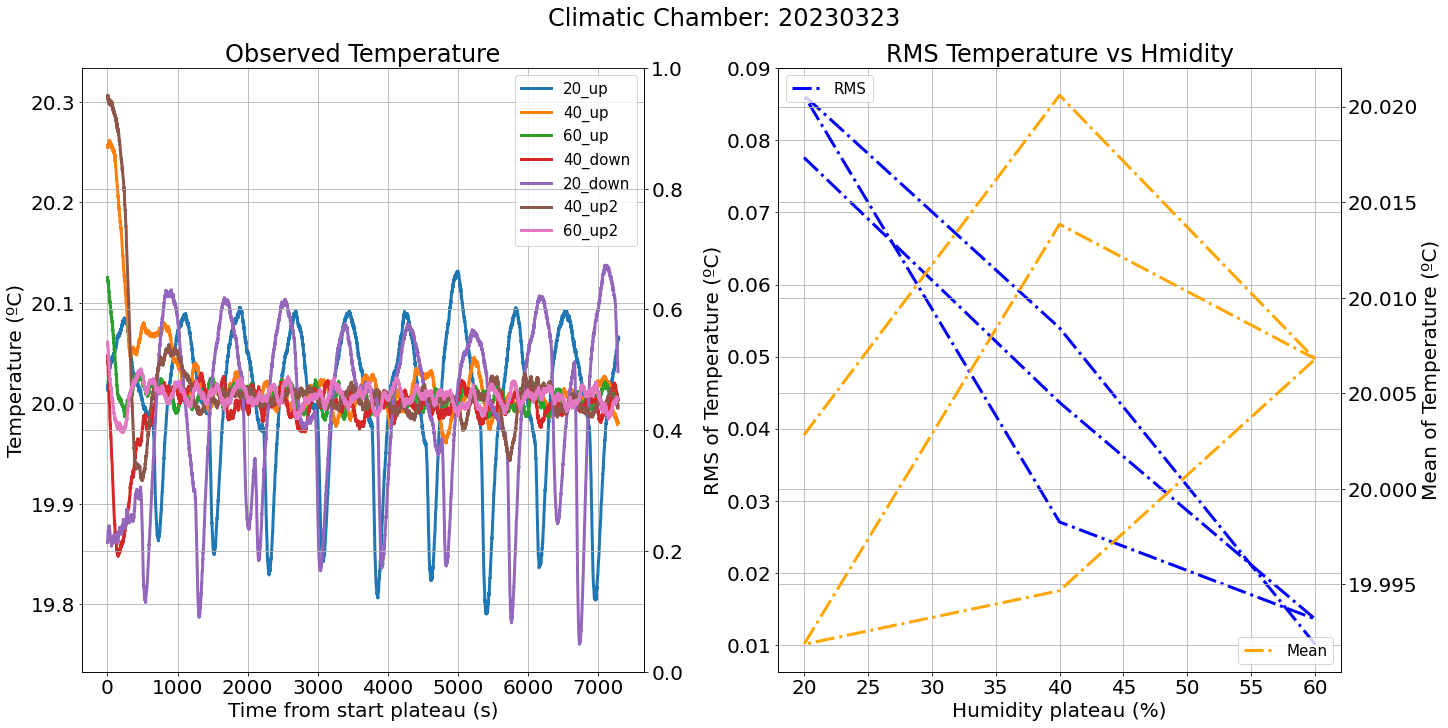

In [104]:
def plot_observed_temperature(date):
    fig, axes = graphic_tools.make_figure(ncols=2, nrows=1)
    twin_axes = graphic_tools.get_twin_axes(axes)
    fig.set_size_inches(20, 10)
    fig.suptitle("Climatic Chamber: " + date)
    #The next line loads the raw data from the climatic chamber
    climatic_chamber = getters.get_raw_data(path_to_split=path+date+"/", filetype="humidity", pol="Hum").sort_values(by="Timestamp").reset_index(drop=True)
    acumulated_differences = []
    TEMPS, STDS, MEANS = [], [], []
    for plateau in plateaus[date]:
        t0 = plateaus[date][plateau][0]
        tf = plateaus[date][plateau][1]
        tcut = climatic_chamber.loc[(climatic_chamber["Timestamp"]>t0)&(climatic_chamber["Timestamp"]<tf)]
        axes[0].plot(tcut["Timestamp"]-t0,tcut["T"],label=plateau)
        # tcut = climatic_chamber.loc[(climatic_chamber["Timestamp"]>t0+2500)&(climatic_chamber["Timestamp"]<t0+14350)]
        acumulated_differences += list(tcut["T"].values)
        TEMPS.append(int(plateau.split("_")[0]))
        MEANS.append(np.mean(tcut["T"]))
        STDS.append(np.std(tcut["T"]))

    twin_axes[1].plot(TEMPS, MEANS, "-.", color="orange", label="Mean")
    axes[1].plot(TEMPS, STDS, "-.", color="blue", label="RMS")
    axes[0].legend(fontsize=15)
    axes[1].legend(loc="upper left", fontsize=15)
    twin_axes[1].legend(loc="lower right", fontsize=15)
    axes[0].set_title("Observed Temperature")
    axes[0].set_xlabel("Time from start plateau (s)")
    axes[0].set_ylabel("Temperature (ºC)")
    axes[1].set_title("RMS Temperature vs Hmidity")
    axes[1].set_xlabel("Humidity plateau (%)")
    axes[1].set_ylabel("RMS of Temperature (ºC)")
    twin_axes[1].set_ylabel("Mean of Temperature (ºC)")
    #We notice how the agreement within the first 2500s is not very good, so the cuts have to be shortened 2500s from the starting point
    # axes[0].axvline(2500, linestyle="-.", color="orange")
    # axes[0].axvline(14350, linestyle="-.", color="orange")
plot_observed_temperature(date)

## 20230327 ##
# Description of the run #

* This run is a *temperature profile* run. It has 8 plateaus of 4 hour long each and a total elapsed time of 22h.
* It has only one fibre connected, *FBG2*, containing 4 sensors and coating type *ORMOCER*

Keys to read: ['Hum1']


Reading humidity key: Hum: 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]


The plateau at 20_up is 3 hours long
The plateau at 40_up is 3 hours long
The plateau at 60_up is 3 hours long
The plateau at 40_down is 3 hours long
The plateau at 20_down is 3 hours long
The plateau at 40_up2 is 3 hours long
The plateau at 60_up2 is 3 hours long


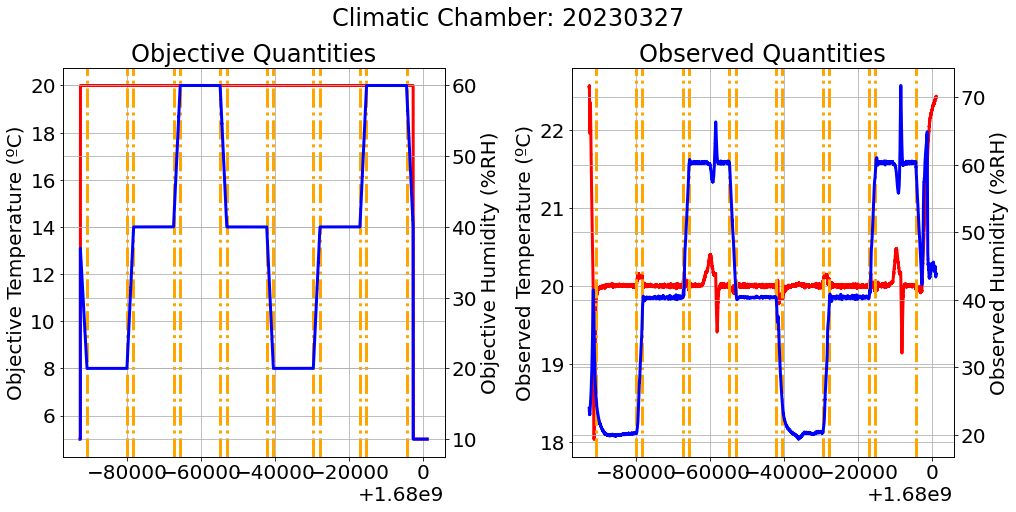

In [105]:
date = "20230327"
plot_objective_observed(date)

Keys to read: ['Hum1']


Reading humidity key: Hum: 100%|██████████| 1/1 [00:00<00:00, 57.29it/s]


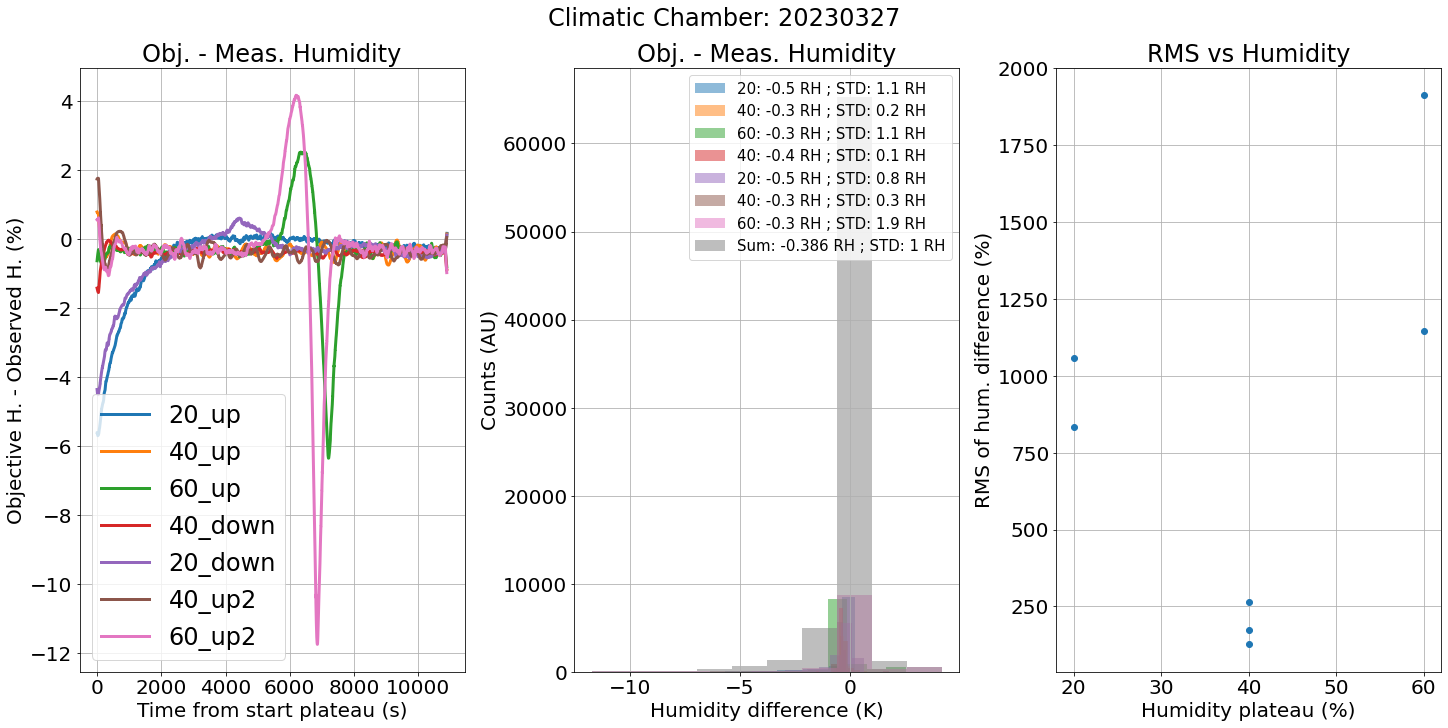

In [106]:
plot_objective_observed_difference(date)

Keys to read: ['Hum1']


Reading humidity key: Hum: 100%|██████████| 1/1 [00:00<00:00, 24.62it/s]


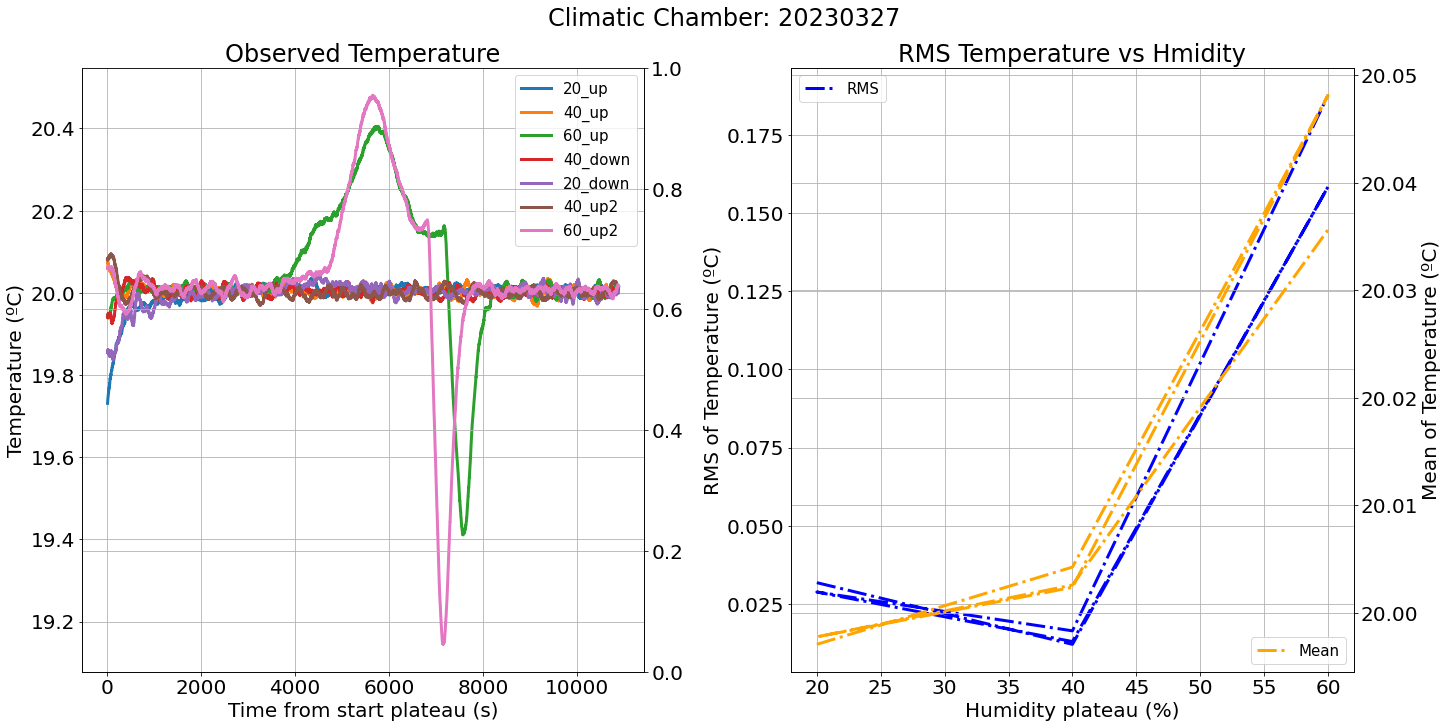

In [107]:
plot_observed_temperature(date)

## 20230328 ##
# Description of the run #

* This run is a *humidity profile* run. It has 8 plateaus of 4 hour long each and a total elapsed time of 22h.
* It has two fibres connected, *FBG2*, containing 4 sensors and coating type *ORMOCER*, and *FBG3* containing 5 sensors and coating type *ORMOCER-T*.

Keys to read: ['Hum1']


Reading humidity key: Hum: 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]


The plateau at 20_up is 2 hours long
The plateau at 40_up is 2 hours long
The plateau at 60_up is 2 hours long
The plateau at 40_down is 2 hours long
The plateau at 20_down is 2 hours long
The plateau at 40_up2 is 2 hours long
The plateau at 60_up2 is 2 hours long


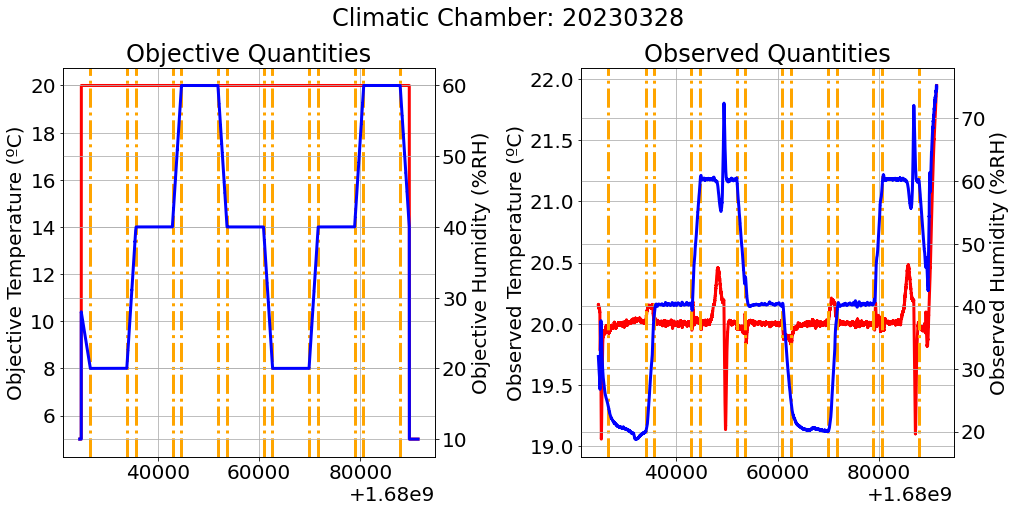

In [108]:
date ="20230328"
plot_objective_observed(date)

Keys to read: ['Hum1']


Reading humidity key: Hum: 100%|██████████| 1/1 [00:00<00:00, 44.00it/s]


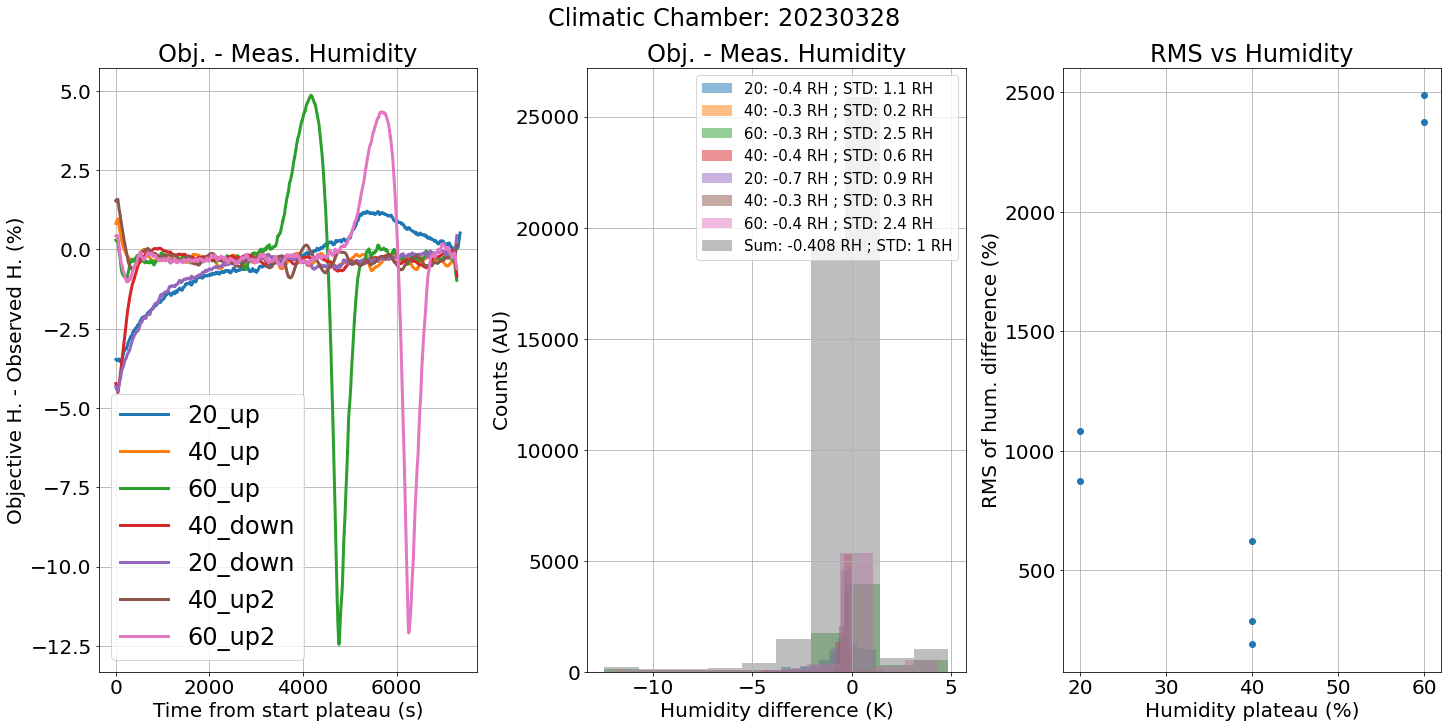

In [109]:
plot_objective_observed_difference(date)

Keys to read: ['Hum1']


Reading humidity key: Hum: 100%|██████████| 1/1 [00:00<00:00, 70.02it/s]


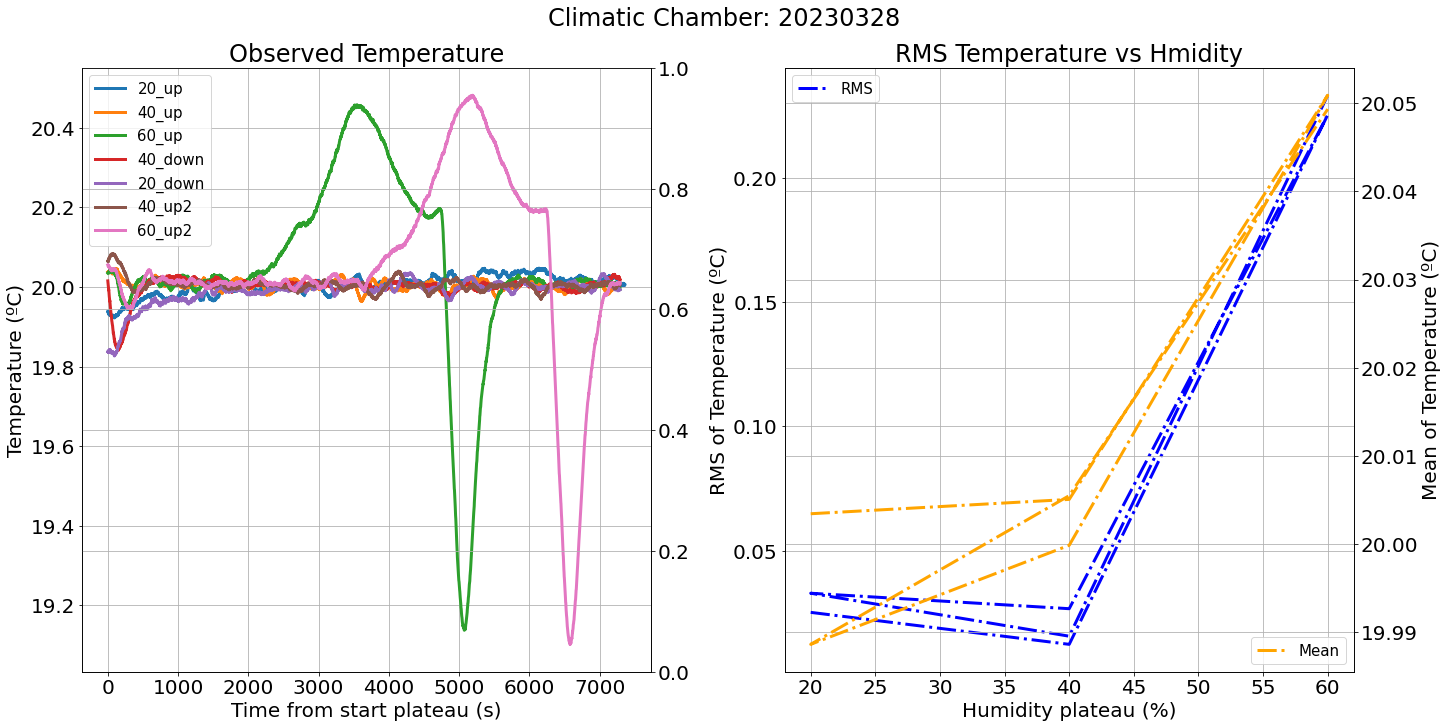

In [110]:
plot_observed_temperature(date)

# Performance of the Climatic Chamber #

The aim of this section is to find a set of parameters that define the performance of the climatic chamber with respect to 2 main aspects:

* Temperature accuracy & resolution
* Humidity accuracy & resolution

With these values one can get an estimation of the systematic errors regarding the temperature and humidity stabilisation values.

To do so, one gets the mean of the temperature and humidity values in each of the plateaus for all temperature and humidity runs.

Keys to read: ['Hum1', 'Hum2']


Reading humidity key: Hum: 100%|██████████| 2/2 [00:00<00:00,  3.29it/s]


Keys to read: ['Hum1']


Reading humidity key: Hum: 100%|██████████| 1/1 [00:00<00:00, 14.68it/s]


Keys to read: ['Hum1']


Reading humidity key: Hum: 100%|██████████| 1/1 [00:00<00:00, 24.45it/s]


Keys to read: ['Hum1']


Reading humidity key: Hum: 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]


Keys to read: ['Hum1']


Reading humidity key: Hum: 100%|██████████| 1/1 [00:00<00:00, 21.67it/s]


Keys to read: ['Hum1']


Reading humidity key: Hum: 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]


Text(25, -4, 'RH acc: -1.2 +- 0.8 %')

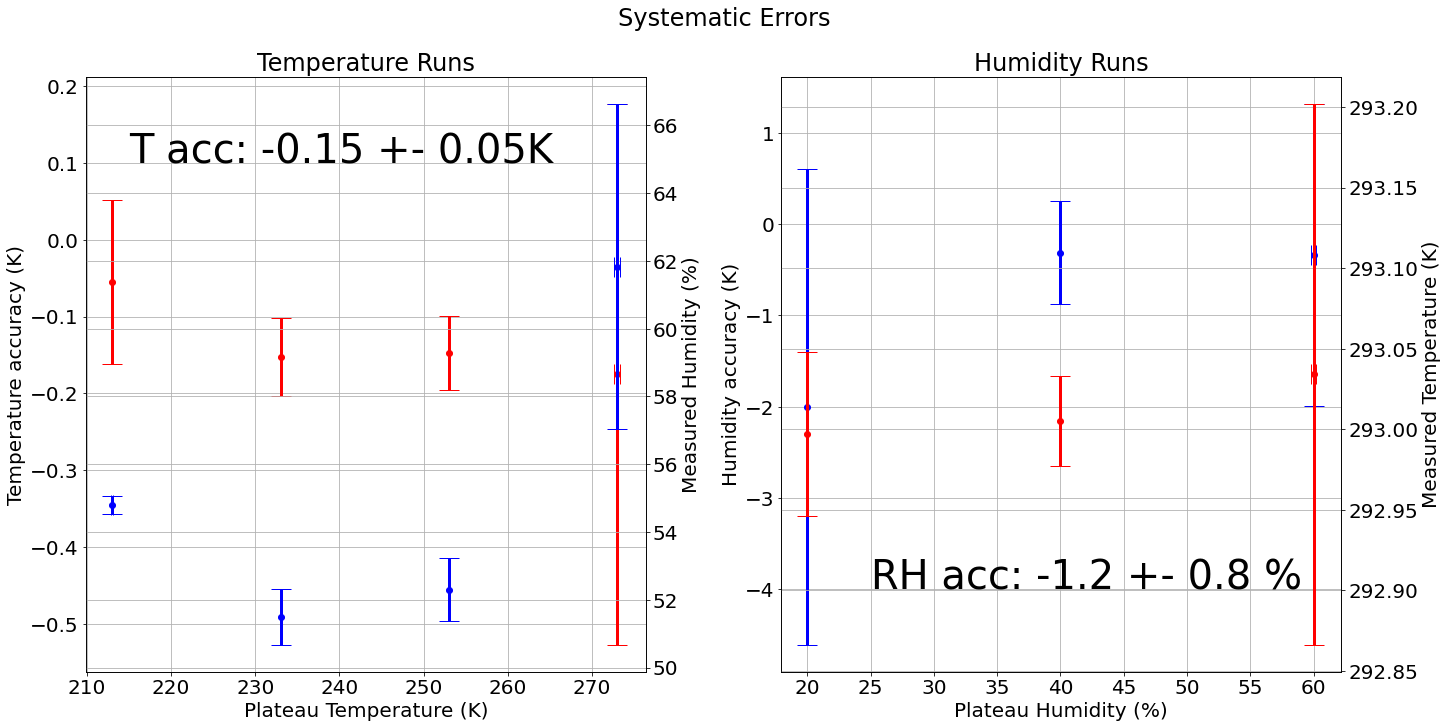

In [121]:
tdates = ["20230321", "20230322", "20230329"]
hdates = ["20230323", "20230327", "20230328"]

fig, axes = graphic_tools.make_figure(ncols=2, nrows=1)
fig.suptitle("Systematic Errors")
twin_axes = graphic_tools.get_twin_axes(axes)
fig.set_size_inches((20,10))
TEMPS = {"273":[], "253":[], "233":[], "213":[]}
HUMS = {"273":[], "253":[], "233":[], "213":[]}
for date in tdates:
    climatic_chamber = getters.get_raw_data(path_to_split=path+date+"/", filetype="humidity", pol="Hum").sort_values(by="Timestamp").reset_index(drop=True)
    for plateau in plateaus[date]:
        t0 = plateaus[date][plateau][0]
        tf = plateaus[date][plateau][1]
        temp = plateau.split("_")[0]
        tcut = climatic_chamber.loc[(climatic_chamber["Timestamp"]>t0+2000)&(climatic_chamber["Timestamp"]<tf)]
        TEMPS[temp] += list((tcut["ObRH"] - tcut["T"]).values)
        HUMS[temp] += list((tcut["RH"]).values)

for temp in TEMPS.keys():
    axes[0].errorbar(int(temp), np.mean(TEMPS[temp]), fmt="o", capsize=10,
                     xerr=np.std(TEMPS[temp]), yerr=np.std(TEMPS[temp]), color="red")
    twin_axes[0].errorbar(int(temp), np.mean(HUMS[temp]), fmt="o", capsize=10,
                          xerr=np.std(TEMPS[temp]), yerr=np.std(HUMS[temp]), color="blue")

TEMPS = {"20":[], "40":[], "60":[]}
HUMS = {"20":[], "40":[], "60":[]}
for date in hdates:
    climatic_chamber = getters.get_raw_data(path_to_split=path+date+"/",
                                            filetype="humidity",
                                            pol="Hum").sort_values(by="Timestamp").reset_index(drop=True)
    for plateau in plateaus[date]:
        t0 = plateaus[date][plateau][0]
        tf = plateaus[date][plateau][1]
        temp = plateau.split("_")[0]
        tcut = climatic_chamber.loc[(climatic_chamber["Timestamp"]>t0)&(climatic_chamber["Timestamp"]<tf)]
        TEMPS[temp] += list((tcut["T"]).values)
        HUMS[temp] += list((tcut["ObT"] - tcut["RH"]).values)
    
for temp in TEMPS.keys():
    twin_axes[1].errorbar(int(temp), np.mean(TEMPS[temp]) + 273, fmt="o", capsize=10,
                          xerr=np.std(TEMPS[temp]), yerr=np.std(TEMPS[temp]), color="red")
    axes[1].errorbar(int(temp), np.mean(HUMS[temp]), fmt="o", capsize=10,
                     xerr=np.std(TEMPS[temp]), yerr=np.std(HUMS[temp]), color="blue")
    
axes[0].set_title("Temperature Runs")
axes[0].set_ylabel("Temperature accuracy (K)")
twin_axes[0].set_ylabel("Measured Humidity (%)")
axes[0].set_xlabel("Plateau Temperature (K)")    
axes[1].set_title("Humidity Runs")
axes[1].set_ylabel("Humidity accuracy (K)")
twin_axes[1].set_ylabel("Measured Temperature (K)")
axes[1].set_xlabel("Plateau Humidity (%)")
axes[0].annotate(r"T acc: -0.15 +- 0.05K", xy=(215, 0.1), fontsize=40)
axes[1].annotate(r"RH acc: -1.2 +- 0.8 %", xy=(25, -4), fontsize=40)

On the left plot one can see the summary for the temperature runs, while in the right plot the summary for the humidity runs.

Accuracies are defined as the difference between the objective value and the measured value within the plateaus.